In [8]:
from sklearn import datasets
from tensorflow import keras

import keras
from tensorflow import keras
# from tensorflow.keras import XXX
from keras.datasets import mnist
import numpy as np

In [17]:


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_train = train_images.reshape(train_images.shape[0],-1) / 255
x_test = test_images.reshape(test_images.shape[0],-1) / 255

y_train = train_labels
y_test = test_labels


In [54]:
input_size = x_train.shape[1]
hidden_size1 = 512
hidden_size2 = 512
output_size = np.max(y_train) + 1
learning_rate = 0.1
epochs = 20

# Inicjalizacja wag i biasów
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size1) * 0.1
b1 = np.zeros((1, hidden_size1))
W2 = np.random.randn(hidden_size1, hidden_size2) * 0.1
b2 = np.zeros((1, hidden_size2))
W3 = np.random.randn(hidden_size2, output_size) * 0.1
b3 = np.zeros((1,output_size))

In [57]:

# def activation_function(x: float) -> float:
#     # TODO
#     return 1/(1 + np.exp(-x))


# def activation_function_deriv(x: float) -> float:
#     # TODO
#     # return  np.exp(x)/(np.exp(2 * x) + 2 * np.exp(x) + 1)
#     s = activation_function(x)
#     return s * (1 - s)

def activation_function(z):
    return np.maximum(0, z)

def activation_function_deriv(a):
    return (a > 0).astype(float)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def categorical_cross_entropy_loss(y,y_pred):
    

    n_samples = len(y_pred)
    # wybieramy prawdopodobieństwo dla prawidłowej klasy
    probs = y_pred[np.arange(n_samples), y]
    return -np.mean(np.log(probs + 1e-8))
    n = len(y_pred)

    return -1/n * np.sum(np.sum(y * np.log(y_pred)))



In [58]:

for i in range(epochs):
    z1 = np.dot(x_train,W1) + b1
    a1 = activation_function(z1)


    z2 = np.dot(a1,W2) + b2
    a2 = activation_function(z2)

    z3 = np.dot(a2, W3) + b3
    # a3 = activation_function(z3)
    a3 = softmax(z3)

    loss = categorical_cross_entropy_loss(y_train,a3)

    print(f"For epoch: {i} - loss = {loss}")



    der1 = activation_function_deriv(a2)

    der2 = activation_function_deriv(a1)

    dz3 = a3.copy()
    dz3[np.arange(y_train.shape[0]), y_train] -= 1
    dW3 = np.dot(a2.T,dz3)
    db3 = np.sum(dz3,axis=0,keepdims=True)

    dz2 = np.dot(dz3,W3.T) * der1
    dW2 = np.dot(a1.T,dz2)
    db2 = np.sum(dz2,axis=0,keepdims=True)

    dz1 = np.dot(dz2,W2.T) * der2
    dW1 = np.dot(x_train.T,dz1)
    db1 = np.sum(dz1,axis=0,keepdims=True)

    W3 -= learning_rate * dW3 / x_train.shape[0]
    b3 -= learning_rate * db3 / x_train.shape[0]
    W2 -= learning_rate * dW2 / x_train.shape[0]
    b2 -= learning_rate * db2 / x_train.shape[0]
    W1 -= learning_rate * dW1 / x_train.shape[0]
    b1 -= learning_rate * db1 / x_train.shape[0]




    
    

For epoch: 0 - loss = 2.0369288971312076
For epoch: 1 - loss = 2.595873537921103
For epoch: 2 - loss = 3.6256057382693747
For epoch: 3 - loss = 3.0943413833731688
For epoch: 4 - loss = 2.739309742443162
For epoch: 5 - loss = 2.21417924367469
For epoch: 6 - loss = 1.4678720542644672
For epoch: 7 - loss = 0.8807883406306651
For epoch: 8 - loss = 0.7138755409355724
For epoch: 9 - loss = 0.6746038935549039
For epoch: 10 - loss = 0.6494530535074627
For epoch: 11 - loss = 0.6255763471326674
For epoch: 12 - loss = 0.6060594828732546
For epoch: 13 - loss = 0.5868252495341726
For epoch: 14 - loss = 0.5707006896526569
For epoch: 15 - loss = 0.5545755390027899
For epoch: 16 - loss = 0.5408716696914602
For epoch: 17 - loss = 0.5272552244260007
For epoch: 18 - loss = 0.5154842830060476
For epoch: 19 - loss = 0.5039691221860614


In [ ]:
def predict(x):
    z1 = np.dot(x,W1) + b1
    a1 = activation_function(z1)

    z2 = np.dot(a1,W2) + b2
    a2 = activation_function(z2)

    z3 = np.dot(a2,W3) + b3
    a3 = activation_function(z3)

    return np.argmax(a3,axis=1)

y_pred = predict(x_test)

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)




Dokładność: 0.8613


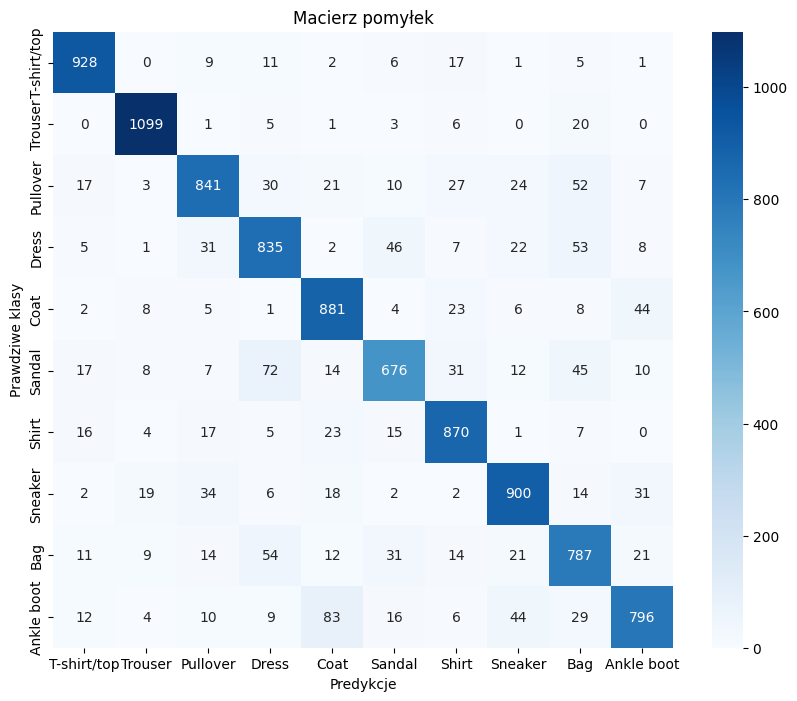

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  

cm = confusion_matrix(y_test, y_pred)
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"] # nazwy klas FashionMNIST

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe klasy')
plt.title('Macierz pomyłek')
plt.show()